In [7]:
# CS 201 3/27/2022 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#np.set_printoptions(precision = 4, suppress = True)

try:
    os.chdir("/home/saanviperi")
except:
    print("No such folder")

mystocks = ["AAPL", "AMZN", "MSFT"]

def download():
    # need to run only once!
    try:
        import pandas_datareader as pdr
    except:
        print("PDR not found")
    # need to run only once!
    mykey = "deb326d302cdb361f771c2f978c2fd19ca9159a5"
    df = pdr.get_data_tiingo(mystocks, start = "JAN-01-2010", api_key = mykey)
    df.to_pickle("top3tech.pkl")

#uncomment to download data
#download()

df = pd.read_pickle("top3tech.pkl")
print(df)


                                   close    high     low    open    volume  \
symbol date                                                                  
AAPL   2010-01-04 00:00:00+00:00  214.01  214.50  212.38  213.43  17633200   
       2010-01-05 00:00:00+00:00  214.38  215.59  213.25  214.60  21496600   
       2010-01-06 00:00:00+00:00  210.97  215.23  210.75  214.38  19720000   
       2010-01-07 00:00:00+00:00  210.58  212.00  209.05  211.75  17040400   
       2010-01-08 00:00:00+00:00  211.98  212.00  209.06  210.30  15986100   
...                                  ...     ...     ...     ...       ...   
MSFT   2022-03-28 00:00:00+00:00  310.70  310.80  304.33  304.33  29578188   
       2022-03-29 00:00:00+00:00  315.41  315.82  309.05  313.91  30393403   
       2022-03-30 00:00:00+00:00  313.86  315.95  311.58  313.76  28163555   
       2022-03-31 00:00:00+00:00  308.31  315.14  307.89  313.90  33422070   
       2022-04-01 00:00:00+00:00  309.42  310.13  305.54  309.37

In [2]:
df.columns
df.describe()
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2010-01-04 00:00:00+00:00  214.01  214.50  212.38  213.43  17633200   
       2010-01-05 00:00:00+00:00  214.38  215.59  213.25  214.60  21496600   
       2010-01-06 00:00:00+00:00  210.97  215.23  210.75  214.38  19720000   
       2010-01-07 00:00:00+00:00  210.58  212.00  209.05  211.75  17040400   
       2010-01-08 00:00:00+00:00  211.98  212.00  209.06  210.30  15986100   

                                  adjClose   adjHigh    adjLow   adjOpen  \
symbol date                                                                
AAPL   2010-01-04 00:00:00+00:00  6.543876  6.558859  6.494035  6.526141   
       2010-01-05 00:00:00+00:00  6.555190  6.592189  6.520637  6.561917   
       2010-01-06 00:00:00+00:00  6.450921  6.581181  6.444194  6.555190   
       2010-01-07 00:00:00+00:00  6.438996  6.482416  6.392212  6.474771   
       2010-01-08 00:00:00+00:00  6.481804  6.482416  6.392518  6.430434   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2010-01-04 00:00:00+00:00  493730093      0.0          1.0  
       2010-01-05 00:00:00+00:00  601905401      0.0          1.0  
       2010-01-06 00:00:00+00:00  552160552      0.0          1.0  
       2010-01-07 00:00:00+00:00  477131677      0.0          1.0  
       2010-01-08 00:00:00+00:00  447611247      0.0          1.0

Dataframe columns: 
Index(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')
{'AAPL': array([[2.14010000e+02, 2.14500000e+02, 2.12380000e+02, ...,
        4.93730093e+08, 0.00000000e+00, 1.00000000e+00],
       [2.14380000e+02, 2.15590000e+02, 2.13250000e+02, ...,
        6.01905401e+08, 0.00000000e+00, 1.00000000e+00],
       [2.10970000e+02, 2.15230000e+02, 2.10750000e+02, ...,
        5.52160552e+08, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.77770000e+02, 1.79610000e+02, 1.76700000e+02, ...,
        9.26331540e+07, 0.00000000e+00, 1.00000000e+00],
       [1.74610000e+02, 1.78030000e+02, 1.74400000e+02, ...,
        1.03049285e+08, 0.00000000e+00, 1.00000000e+00],
       [1.74310000e+02, 1.74880000e+02, 1.71940000e+02, ...,
        7.87513280e+07, 0.00000000e+00, 1.00000000e+00]]), 'AMZN': array([[1.339000e+02, 1.366100e+02, 1.331400e+02, ..., 7.599900e+06,
        0.

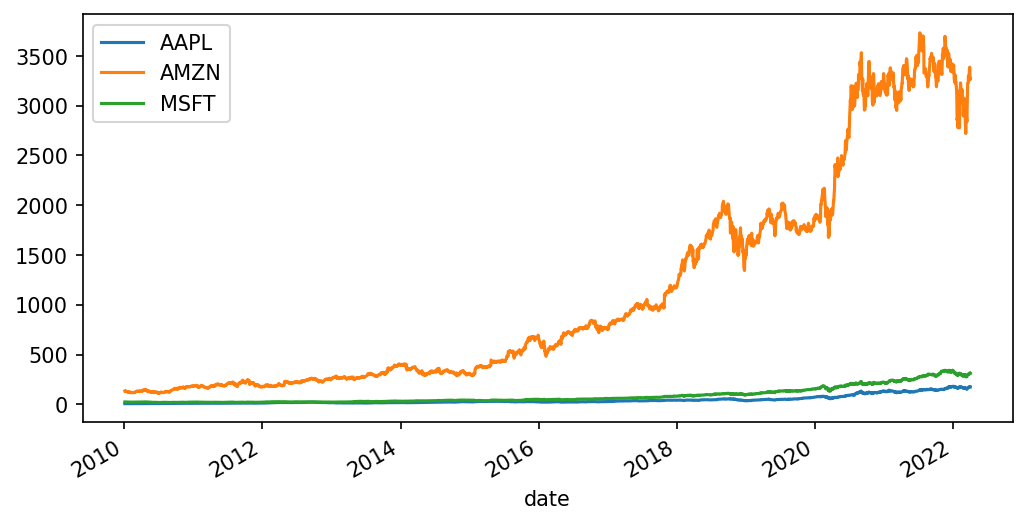

In [6]:
print("Dataframe columns: ")
print(df.columns) # adjClose is 5

plt.figure(num = 1, figsize = (8, 4), dpi = 150)
for i in mystocks:
    df['adjClose'][i].plot(label = i)
plt.legend()

S = {} # dictionary

# note: df.xs('MSFT') is just MSFT data (cross section)
for i in mystocks:
    S[i] = df.xs(i).to_numpy()

print(S)
print("_" * 40) 
print(S.keys())
print(type(S[mystocks[0]]))
print(S['MSFT'][:, 5]) # print adjClose for MSFT only

for i in mystocks:
    print(f"NP array shape for {i} {S[i].shape}")

stockname = 'MSFT'
nrows = S[stockname].shape[0] # number of rows in numpy array
A = np.zeros((nrows, 6))

A[:, 0] = S[stockname][:, 5] # adjClose values
A[:, 1] = np.roll(A[:, 0], 1) # lag of 1 or previous day
A[:, 2] = (A[:, 0] - A[:, 1])/A[:, 1] # changearr
print()
print("--"*40)
print(A[:, 2])
print("--"*40)
print("_" * 40) 
print(A[0:10, 0:3])

A[:, 3] = np.roll(A[:, 2], 1) # change lag 1
A[:, 4] = np.roll(A[:, 2], 2) # change lag 2
A[:, 5] = np.roll(A[:, 2], 3) # change lag 3

print()
print("_" * 40) 
print(A[0:10, 0:6])

A = A[3:, :] # deletes first four rows (because of missing data and incorrect lags)

print()
print("_" * 40) 
print(A[0:10, 0:6])
print("_______________________")
print(A)
print(S)
 

In [4]:
arr = df.to_numpy()
print(arr)


[[2.14010000e+02 2.14500000e+02 2.12380000e+02 ... 4.93730093e+08
  0.00000000e+00 1.00000000e+00]
 [2.14380000e+02 2.15590000e+02 2.13250000e+02 ... 6.01905401e+08
  0.00000000e+00 1.00000000e+00]
 [2.10970000e+02 2.15230000e+02 2.10750000e+02 ... 5.52160552e+08
  0.00000000e+00 1.00000000e+00]
 ...
 [3.13860000e+02 3.15950000e+02 3.11580000e+02 ... 2.81635550e+07
  0.00000000e+00 1.00000000e+00]
 [3.08310000e+02 3.15140000e+02 3.07890000e+02 ... 3.34220700e+07
  0.00000000e+00 1.00000000e+00]
 [3.09420000e+02 3.10130000e+02 3.05540000e+02 ... 2.71105290e+07
  0.00000000e+00 1.00000000e+00]]


In [5]:
result[:, 2] = (result[:, 0] - result[:, 1])/result[:, 1]
result = np.diff(arr[:,0])
print(result)   
result[:, 1] = np.roll(result[:, 2], 1) # change lag 1
result[:, 2] = np.roll(result[:, 2], 2) # change lag 2
result[:, 3] = np.roll(result[:, 2], 3) # change lag 3
result[:, 4] = np.roll(result[:, 2], 4) # change lag 4
result = result[5:, :]#deletes first 5 rows of all columns

NameError: name 'result' is not defined

In [ ]:
arr = np.array([[1, 2, 3, 4, 5],
               [5, 4, 3, 2, 1],
               [1, 2, 3, 4, 5],
               [5, 4, 3, 2, 1],
               [1, 2, 3, 4, 5]])

result = np.diff(arr[:,0])
print(result) 
print(arr[:,1])